In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./OnlineRetail.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
# 데이터 전체 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
# 수량, 가격에 음수가 있다니! 수량, 가격 모두 음수와 0을 제거한다. null값도

df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df = df.dropna()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [7]:
# 용량이 조금 커서 조정

df['Quantity'] = df['Quantity'].astype(np.int32)
df['CustomerID'] = df['CustomerID'].astype(np.int32)
df['UnitPrice'] = df['UnitPrice'].astype(np.float32)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int32  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float32
 6   CustomerID   397884 non-null  int32  
 7   Country      397884 non-null  object 
dtypes: float32(1), int32(2), object(5)
memory usage: 22.8+ MB


In [8]:
# 총 금액이 없어서 추가

df['TotalPrice'] = round(df['Quantity'] * df['UnitPrice'], 2)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France,16.60


In [10]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], infer_datetime_format = True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [11]:
# 11년 12월은 9일까지 데이터밖에 없어서 11년 12월 데이터 삭제

df = df[df['InvoiceDate'] < '2011-12-01']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
516364,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-30 17:37:00,1.25,15444,United Kingdom,5.00
516365,579885,21742,LARGE ROUND WICKER PLATTER,2,2011-11-30 17:37:00,5.95,15444,United Kingdom,11.90
516366,579885,23084,RABBIT NIGHT LIGHT,6,2011-11-30 17:37:00,2.08,15444,United Kingdom,12.48
516367,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30 17:37:00,7.95,15444,United Kingdom,7.95


In [12]:
# 구매 날짜 정리하기

def get_month(date):
    return datetime(date.year, date.month, 1)

In [13]:
df['Month'] = df['InvoiceDate'].apply(get_month)
df

/var/folders/j2/qvzy45bn0l71dytmdq4v9r6r0000gn/T/ipykernel_32595/2331078291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['InvoiceDate'].apply(get_month)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
516364,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-30 17:37:00,1.25,15444,United Kingdom,5.00,2011-11-01
516365,579885,21742,LARGE ROUND WICKER PLATTER,2,2011-11-30 17:37:00,5.95,15444,United Kingdom,11.90,2011-11-01
516366,579885,23084,RABBIT NIGHT LIGHT,6,2011-11-30 17:37:00,2.08,15444,United Kingdom,12.48,2011-11-01
516367,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30 17:37:00,7.95,15444,United Kingdom,7.95,2011-11-01


In [14]:
# 고객별 최초 구매 월 찾기위해 고객별로 월 묶기
month_group = df.groupby('CustomerID')['Month']

# 최초 구매 월 컬럼 추가
df['Month_started'] = month_group.transform(np.min)
df

/var/folders/j2/qvzy45bn0l71dytmdq4v9r6r0000gn/T/ipykernel_32595/1464221488.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month_started'] = month_group.transform(np.min)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Month_started
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...
516364,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-30 17:37:00,1.25,15444,United Kingdom,5.00,2011-11-01,2011-10-01
516365,579885,21742,LARGE ROUND WICKER PLATTER,2,2011-11-30 17:37:00,5.95,15444,United Kingdom,11.90,2011-11-01,2011-10-01
516366,579885,23084,RABBIT NIGHT LIGHT,6,2011-11-30 17:37:00,2.08,15444,United Kingdom,12.48,2011-11-01,2011-10-01
516367,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30 17:37:00,7.95,15444,United Kingdom,7.95,2011-11-01,2011-10-01


In [15]:
# 고객의 최초 구매월부터 각 구매날짜까지 몇달 지났는지 계산
# 각 년도 빼주고 *12(월로 계산할거니까)한 값과 각 월 뺀 값 더하기

df['Month_passed'] = (df['Month'].dt.year - df['Month_started'].dt.year) * 12 + (df['Month'].dt.month - df['Month_started'].dt.month)
df

/var/folders/j2/qvzy45bn0l71dytmdq4v9r6r0000gn/T/ipykernel_32595/3866652109.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month_passed'] = (df['Month'].dt.year - df['Month_started'].dt.year) * 12 + (df['Month'].dt.month - df['Month_started'].dt.month)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Month_started,Month_passed
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,2010-12-01,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,2010-12-01,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...
516364,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-30 17:37:00,1.25,15444,United Kingdom,5.00,2011-11-01,2011-10-01,1
516365,579885,21742,LARGE ROUND WICKER PLATTER,2,2011-11-30 17:37:00,5.95,15444,United Kingdom,11.90,2011-11-01,2011-10-01,1
516366,579885,23084,RABBIT NIGHT LIGHT,6,2011-11-30 17:37:00,2.08,15444,United Kingdom,12.48,2011-11-01,2011-10-01,1
516367,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30 17:37:00,7.95,15444,United Kingdom,7.95,2011-11-01,2011-10-01,1


In [16]:
# Month_started와 Month_passed별로 고객 수 카운팅

grouped = df.groupby(['Month_started', 'Month_passed'])
cohort_df = pd.DataFrame(grouped['CustomerID'].nunique())
cohort_df

CustomerID
Month_started Month_passed            
2010-12-01    0                    885
              1                    324
              2                    286
              3                    340
              4                    321
...                                ...
2011-09-01    1                     70
              2                     90
2011-10-01    0                    358
              1                     86
2011-11-01    0                    323

[78 rows x 1 columns]

In [17]:
# 시각화를 위해 형태 조정

cohort_df = cohort_df.reset_index()
cohort_df

,Month_started,Month_passed,CustomerID
0,2010-12-01,0,885
1,2010-12-01,1,324
2,2010-12-01,2,286
3,2010-12-01,3,340
4,2010-12-01,4,321
...,...,...,...
73,2011-09-01,1,70
74,2011-09-01,2,90
75,2011-10-01,0,358
76,2011-10-01,1,86


In [18]:
cohort_df = cohort_df.pivot(index = 'Month_started', columns = 'Month_passed')
cohort_df

CustomerID                                                   \
Month_passed          0      1      2      3      4      5      6      7    
Month_started                                                               
2010-12-01         885.0  324.0  286.0  340.0  321.0  352.0  321.0  309.0   
2011-01-01         417.0   92.0  111.0   96.0  134.0  120.0  103.0  101.0   
2011-02-01         380.0   71.0   71.0  108.0  103.0   94.0   96.0  106.0   
2011-03-01         452.0   68.0  114.0   90.0  101.0   76.0  121.0  104.0   
2011-04-01         300.0   64.0   61.0   63.0   59.0   68.0   65.0   78.0   
2011-05-01         284.0   54.0   49.0   49.0   59.0   66.0   75.0    NaN   
2011-06-01         242.0   42.0   38.0   64.0   56.0   81.0    NaN    NaN   
2011-07-01         188.0   34.0   39.0   42.0   51.0    NaN    NaN    NaN   
2011-08-01         169.0   35.0   42.0   41.0    NaN    NaN    NaN    NaN   
2011-09-01         299.0   70.0   90.0    NaN    NaN    NaN    NaN    NaN   
2011-10-01         358.0   86.0    NaN    NaN    NaN    NaN    NaN    NaN   
2011-11-01         323.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                           
Month_passed      8      9      10     11  
Month_started                              
2010-12-01     313.0  350.0  331.0  445.0  
2011-01-01     125.0  136.0  152.0    NaN  
2011-02-01      94.0  116.0    NaN    NaN  
2011-03-01     126.0    NaN    NaN    NaN  
2011-04-01       NaN    NaN    NaN    NaN  
2011-05-01       NaN    NaN    NaN    NaN  
2011-06-01       NaN    NaN    NaN    NaN  
2011-07-01       NaN    NaN    NaN    NaN  
2011-08-01       NaN    NaN    NaN    NaN  
2011-09-01       NaN    NaN    NaN    NaN  
2011-10-01       NaN    NaN    NaN    NaN  
2011-11-01       NaN    NaN    NaN    NaN

In [19]:
# 단순 집계를 퍼센트로 바꿔주기
# cohort_df.iloc[:, 0]
cohort_customer = cohort_df.divide(cohort_df.iloc[:, 0],axis = 0) * 100
cohort_customer

CustomerID                                              \
Month_passed          0          1          2          3          4    
Month_started                                                          
2010-12-01         100.0  36.610169  32.316384  38.418079  36.271186   
2011-01-01         100.0  22.062350  26.618705  23.021583  32.134293   
2011-02-01         100.0  18.684211  18.684211  28.421053  27.105263   
2011-03-01         100.0  15.044248  25.221239  19.911504  22.345133   
2011-04-01         100.0  21.333333  20.333333  21.000000  19.666667   
2011-05-01         100.0  19.014085  17.253521  17.253521  20.774648   
2011-06-01         100.0  17.355372  15.702479  26.446281  23.140496   
2011-07-01         100.0  18.085106  20.744681  22.340426  27.127660   
2011-08-01         100.0  20.710059  24.852071  24.260355        NaN   
2011-09-01         100.0  23.411371  30.100334        NaN        NaN   
2011-10-01         100.0  24.022346        NaN        NaN        NaN   
2011-11-01         100.0        NaN        NaN        NaN        NaN   

                                                                      \
Month_passed          5          6          7          8          9    
Month_started                                                          
2010-12-01     39.774011  36.271186  34.915254  35.367232  39.548023   
2011-01-01     28.776978  24.700240  24.220624  29.976019  32.613909   
2011-02-01     24.736842  25.263158  27.894737  24.736842  30.526316   
2011-03-01     16.814159  26.769912  23.008850  27.876106        NaN   
2011-04-01     22.666667  21.666667  26.000000        NaN        NaN   
2011-05-01     23.239437  26.408451        NaN        NaN        NaN   
2011-06-01     33.471074        NaN        NaN        NaN        NaN   
2011-07-01           NaN        NaN        NaN        NaN        NaN   
2011-08-01           NaN        NaN        NaN        NaN        NaN   
2011-09-01           NaN        NaN        NaN        NaN        NaN   
2011-10-01           NaN        NaN        NaN        NaN        NaN   
2011-11-01           NaN        NaN        NaN        NaN        NaN   

                                     
Month_passed          10         11  
Month_started                        
2010-12-01     37.401130  50.282486  
2011-01-01     36.450839        NaN  
2011-02-01           NaN        NaN  
2011-03-01           NaN        NaN  
2011-04-01           NaN        NaN  
2011-05-01           NaN        NaN  
2011-06-01           NaN        NaN  
2011-07-01           NaN        NaN  
2011-08-01           NaN        NaN  
2011-09-01           NaN        NaN  
2011-10-01           NaN        NaN  
2011-11-01           NaN        NaN

In [20]:
cohort_customer = cohort_customer.round(decimals = 2)
cohort_customer

CustomerID                                                   \
Month_passed          0      1      2      3      4      5      6      7    
Month_started                                                               
2010-12-01         100.0  36.61  32.32  38.42  36.27  39.77  36.27  34.92   
2011-01-01         100.0  22.06  26.62  23.02  32.13  28.78  24.70  24.22   
2011-02-01         100.0  18.68  18.68  28.42  27.11  24.74  25.26  27.89   
2011-03-01         100.0  15.04  25.22  19.91  22.35  16.81  26.77  23.01   
2011-04-01         100.0  21.33  20.33  21.00  19.67  22.67  21.67  26.00   
2011-05-01         100.0  19.01  17.25  17.25  20.77  23.24  26.41    NaN   
2011-06-01         100.0  17.36  15.70  26.45  23.14  33.47    NaN    NaN   
2011-07-01         100.0  18.09  20.74  22.34  27.13    NaN    NaN    NaN   
2011-08-01         100.0  20.71  24.85  24.26    NaN    NaN    NaN    NaN   
2011-09-01         100.0  23.41  30.10    NaN    NaN    NaN    NaN    NaN   
2011-10-01         100.0  24.02    NaN    NaN    NaN    NaN    NaN    NaN   
2011-11-01         100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                           
Month_passed      8      9      10     11  
Month_started                              
2010-12-01     35.37  39.55  37.40  50.28  
2011-01-01     29.98  32.61  36.45    NaN  
2011-02-01     24.74  30.53    NaN    NaN  
2011-03-01     27.88    NaN    NaN    NaN  
2011-04-01       NaN    NaN    NaN    NaN  
2011-05-01       NaN    NaN    NaN    NaN  
2011-06-01       NaN    NaN    NaN    NaN  
2011-07-01       NaN    NaN    NaN    NaN  
2011-08-01       NaN    NaN    NaN    NaN  
2011-09-01       NaN    NaN    NaN    NaN  
2011-10-01       NaN    NaN    NaN    NaN  
2011-11-01       NaN    NaN    NaN    NaN

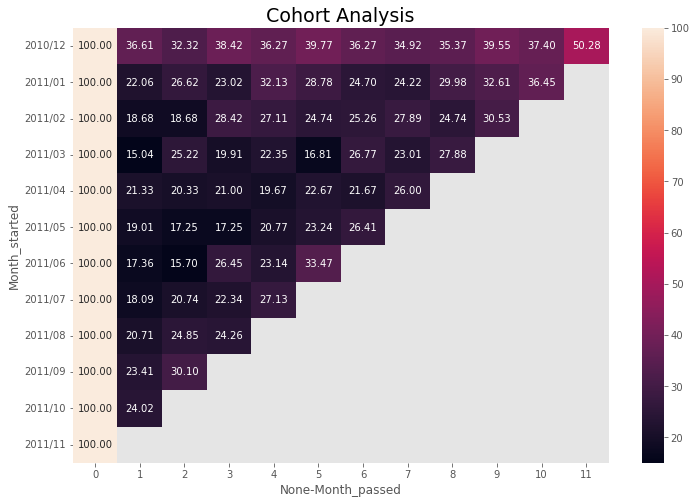

In [21]:
# heatmap 시각화
plt.style.use('ggplot')

xticks = np.arange(0, 12)
yticks = ['2010/12', '2011/01', '2011/02', '2011/03', '2011/04', '2011/05', '2011/06', '2011/07', '2011/08', '2011/09', '2011/10', '2011/11']

plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis', fontsize=19)
sns.heatmap(cohort_customer, annot=True, 
            xticklabels=xticks,
            yticklabels=yticks, 
            fmt='.2f')
plt.show()

- 2010년 12월 첫 구매 고객 그룹이 전체적으로 리텐션이 높다.(가장 위 2010년 12월 행의 그래프 색이 다른 행들에 비해 밝음)
    - 2010년 12월 첫 구매한 고객 그룹 특성 분석 필요
- 가장 최근 월(2011년 11월)의 리텐션이 다른 월들보다 높다.(각 행의 마지막 셀의 그래프 색이 다른 셀들에 비해 밝음)
    - 2011년 11월에 구매한 고객, 판매된 상품 분석 필요

## 2010년 12월 첫구매

In [22]:
df_201012 = df[df['InvoiceDate'] < '2011-01-01']
df_201012

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Month_started,Month_passed
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,2010-12-01,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,2010-12-01,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...
42448,539988,84380,SET OF 3 BUTTERFLY COOKIE CUTTERS,1,2010-12-23 16:06:00,1.25,18116,United Kingdom,1.25,2010-12-01,2010-12-01,0
42449,539988,84849D,HOT BATHS SOAP HOLDER,1,2010-12-23 16:06:00,1.69,18116,United Kingdom,1.69,2010-12-01,2010-12-01,0
42450,539988,84849B,FAIRY SOAP SOAP HOLDER,1,2010-12-23 16:06:00,1.69,18116,United Kingdom,1.69,2010-12-01,2010-12-01,0
42451,539988,22854,CREAM SWEETHEART EGG HOLDER,2,2010-12-23 16:06:00,4.95,18116,United Kingdom,9.90,2010-12-01,2010-12-01,0


In [23]:
df_201012.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice,Month_passed
count,26157.000000,26157.000000,26157.000000,26157.000000,26157.0
mean,11.938105,3.132576,15529.182819,21.895244,0.0
std,45.941418,5.220422,1740.336702,76.642278,0.0
min,1.000000,0.070000,12347.000000,0.140000,0.0
25%,2.000000,1.250000,14161.000000,4.200000,0.0
50%,4.000000,2.100000,15570.000000,10.500000,0.0
75%,12.000000,3.750000,17179.000000,19.800000,0.0
max,2880.000000,295.000000,18269.000000,3828.000000,0.0


In [24]:
round(sum(df_201012['TotalPrice']), 2)

572713.89

In [25]:
df_201012['CustomerID'].nunique()

885

In [26]:
round(sum(df_201012['TotalPrice']) / df_201012['CustomerID'].nunique(), 2)

647.13

In [27]:
df_201012_id = df_201012.groupby('CustomerID').mean()
df_201012_id

,Quantity,UnitPrice,TotalPrice,Month_passed
CustomerID,,,,
12347,10.290323,2.890000,22.960968,0.0
12348,73.764706,2.917647,52.517647,0.0
12370,10.637363,2.894286,20.527692,0.0
12377,14.046512,2.106279,23.291163,0.0
12383,20.378378,1.325135,16.235676,0.0
...,...,...,...,...
18239,7.172414,3.341379,15.106897,0.0
18245,11.000000,1.680370,13.545556,0.0
18259,16.571429,3.157143,53.757143,0.0


In [28]:
df_201012_id.describe()

,Quantity,UnitPrice,TotalPrice,Month_passed
count,885.000000,885.000000,885.000000,885.0
mean,28.789239,3.829574,46.023468,0.0
std,127.190903,10.192426,160.640835,0.0
min,1.000000,0.170000,1.621000,0.0
25%,5.000000,2.338750,12.281364,0.0
50%,9.589744,2.982903,19.158095,0.0
75%,16.000000,3.956250,31.983514,0.0
max,2140.000000,295.000000,3794.400000,0.0


In [29]:
df_201012['CustomerID'].value_counts()

12748    668
17850    297
14911    291
17841    287
14606    228
        ... 
17616      1
13104      1
15070      1
15769      1
15823      1
Name: CustomerID, Length: 885, dtype: int64

In [30]:
df_201012['Country'].value_counts()

United Kingdom     23942
Germany              512
France               434
EIRE                 333
Norway               147
Portugal             116
Belgium               95
Cyprus                83
Spain                 75
Netherlands           72
Japan                 65
Switzerland           49
Italy                 40
Lithuania             35
Australia             32
Iceland               31
Sweden                26
Denmark               20
Channel Islands       17
Finland               17
Poland                 8
Austria                8
Name: Country, dtype: int64

In [31]:
df_201012['Country'].value_counts() / 26157 * 100

United Kingdom     91.531904
Germany             1.957411
France              1.659212
EIRE                1.273082
Norway              0.561991
Portugal            0.443476
Belgium             0.363191
Cyprus              0.317315
Spain               0.286730
Netherlands         0.275261
Japan               0.248499
Switzerland         0.187330
Italy               0.152923
Lithuania           0.133807
Australia           0.122338
Iceland             0.118515
Sweden              0.099400
Denmark             0.076461
Channel Islands     0.064992
Finland             0.064992
Poland              0.030585
Austria             0.030585
Name: Country, dtype: float64

해당 기간에 구매한 고객의 국가 중 약 91.5%는 United Kingdom

In [32]:
df_201012['StockCode'].value_counts()

85123A    207
22834     142
22086     141
22423     140
22111     132
         ... 
20892       1
20695       1
71215       1
22145       1
47585A      1
Name: StockCode, Length: 2411, dtype: int64

In [33]:
df_201012['Description'].value_counts().head(20) / 26157 *100

WHITE HANGING HEART T-LIGHT HOLDER     0.791375
HAND WARMER BABUSHKA DESIGN            0.542876
PAPER CHAIN KIT 50'S CHRISTMAS         0.539053
REGENCY CAKESTAND 3 TIER               0.535230
SCOTTIE DOG HOT WATER BOTTLE           0.504645
CHOCOLATE HOT WATER BOTTLE             0.474060
JAM MAKING SET PRINTED                 0.412891
HOT WATER BOTTLE BABUSHKA              0.412891
HEART OF WICKER SMALL                  0.405245
PAPER CHAIN KIT VINTAGE CHRISTMAS      0.405245
RED WOOLLY HOTTIE WHITE HEART.         0.401422
WHITE SKULL HOT WATER BOTTLE           0.397599
RETROSPOT HEART HOT WATER BOTTLE       0.389953
HEART OF WICKER LARGE                  0.386130
REX CASH+CARRY JUMBO SHOPPER           0.382307
KNITTED UNION FLAG HOT WATER BOTTLE    0.363191
ASSORTED COLOUR BIRD ORNAMENT          0.359368
GREY HEART HOT WATER BOTTLE            0.355545
HAND WARMER BIRD DESIGN                0.351722
FAWN BLUE HOT WATER BOTTLE             0.340253
Name: Description, dtype: float64

- 해당 기간에 고객들이 가장 많이 구매한 상품은 'WHITE HANGING HEART T-LIGHT HOLDER'로 전체의 약 0.8%
- 12월 시즌 특성상 'CHRISTMAS' 키워드가 많이 보이는 편

# 전체 데이터 분석

In [34]:
df.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice,Month_passed
count,380580.000000,380580.000000,380580.000000,380580.000000,380580.000000
mean,12.823582,3.133186,15293.531778,22.053747,3.964389
std,127.733673,22.412727,1712.593737,158.225959,3.729893
min,1.000000,0.001000,12346.000000,0.000000,0.000000
25%,2.000000,1.250000,13969.000000,4.950000,0.000000
50%,6.000000,1.950000,15159.000000,11.900000,3.000000
75%,12.000000,3.750000,16793.000000,19.800000,7.000000
max,74215.000000,8142.750000,18287.000000,77183.600000,11.000000


In [35]:
round(sum(df['TotalPrice']), 2)

8393215.11

In [36]:
df['CustomerID'].nunique()

4297

In [37]:
round(sum(df['TotalPrice']) / df['CustomerID'].nunique(), 2)

1953.27

In [38]:
df_id = df.groupby('CustomerID').mean()
df_id.describe()

,Quantity,UnitPrice,TotalPrice,Month_passed
count,4297.000000,4297.000000,4297.000000,4297.000000
mean,38.647904,4.492264,54.524316,2.081227
std,1136.850559,34.374329,1199.622460,2.343143
min,1.000000,0.122500,1.450000,0.000000
25%,6.000000,2.208500,12.365872,0.000000
50%,9.952381,2.930625,17.704381,1.057143
75%,14.615385,3.847050,24.840395,3.978261
max,74215.000000,2033.099976,77183.600000,9.988506


In [39]:
df['Country'].value_counts()

United Kingdom          338520
Germany                   8723
France                    8017
EIRE                      6917
Spain                     2419
Netherlands               2273
Belgium                   1937
Switzerland               1841
Portugal                  1361
Australia                 1182
Norway                     998
Italy                      750
Channel Islands            743
Finland                    672
Cyprus                     614
Sweden                     450
Austria                    391
Denmark                    369
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    171
Canada                     151
USA                        147
Malta                      112
Greece                     109
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

In [51]:
df['Country'].value_counts() / 380580 *100

United Kingdom          88.948447
Germany                  2.292028
France                   2.106522
EIRE                     1.817489
Spain                    0.635609
Netherlands              0.597246
Belgium                  0.508960
Switzerland              0.483735
Portugal                 0.357612
Australia                0.310579
Norway                   0.262231
Italy                    0.197068
Channel Islands          0.195228
Finland                  0.176573
Cyprus                   0.161333
Sweden                   0.118241
Austria                  0.102738
Denmark                  0.096957
Poland                   0.086710
Japan                    0.084345
Israel                   0.065164
Unspecified              0.064113
Singapore                0.058332
Iceland                  0.044931
Canada                   0.039676
USA                      0.038625
Malta                    0.029429
Greece                   0.028640
United Arab Emirates     0.017867
European Commu

전체 구매 고객 중 약 89%가 United Kingdom에서 주문 -> 특정 기간과 비교했을 때 약 2% 낮은 수치

In [41]:
df['StockCode'].value_counts()

85123A    1976
22423     1675
85099B    1576
47566     1378
84879     1366
          ... 
90212B       1
22351        1
85170A       1
90214Y       1
90187B       1
Name: StockCode, Length: 3657, dtype: int64

In [52]:
df['Description'].value_counts().head(20) / 380580 * 100

WHITE HANGING HEART T-LIGHT HOLDER    0.519208
REGENCY CAKESTAND 3 TIER              0.440118
JUMBO BAG RED RETROSPOT               0.414105
PARTY BUNTING                         0.362079
ASSORTED COLOUR BIRD ORNAMENT         0.358926
LUNCH BAG RED RETROSPOT               0.336592
SET OF 3 CAKE TINS PANTRY DESIGN      0.296915
LUNCH BAG  BLACK SKULL.               0.280099
POSTAGE                               0.275895
PACK OF 72 RETROSPOT CAKE CASES       0.275106
SPOTTY BUNTING                        0.260655
LUNCH BAG SPACEBOY DESIGN             0.258027
LUNCH BAG CARS BLUE                   0.255662
HEART OF WICKER SMALL                 0.251458
NATURAL SLATE HEART CHALKBOARD        0.249093
LUNCH BAG PINK POLKADOT               0.247254
PAPER CHAIN KIT 50'S CHRISTMAS        0.240423
LUNCH BAG SUKI DESIGN                 0.239634
REX CASH+CARRY JUMBO SHOPPER          0.238846
JUMBO BAG PINK POLKADOT               0.229912
Name: Description, dtype: float64

- 고객들이 가장 많이 구매한 상품은 'WHITE HANGING HEART T-LIGHT HOLDER'로 전체의 약 0.5%
- 특정 기간과 비교했을 때 약 0.3% 정도 낮은 수치이지만, 가장 많이 팔린 제품이라는 것은 동일

추가 고객 데이터가 있다면 특정 기간에 구매한 그룹의 특성을 파악할 수 있을것

## 2010년 12월 첫구매 고객의 2011년 11월 구매 정보

In [43]:
df_201012_11 = df[df['Month_started'] == '2010-12-01']
df_201012_11 = df_201012_11[df_201012_11['Month_passed'] == 11]
df_201012_11

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Month_started,Month_passed
431696,573745,21174,POTTERING IN THE SHED METAL SIGN,12,2011-11-01 08:53:00,2.08,17419,United Kingdom,24.96,2011-11-01,2010-12-01,11
431697,573745,21876,POTTERING MUG,12,2011-11-01 08:53:00,1.65,17419,United Kingdom,19.80,2011-11-01,2010-12-01,11
431698,573745,21890,S/6 WOODEN SKITTLES IN COTTON BAG,6,2011-11-01 08:53:00,3.25,17419,United Kingdom,19.50,2011-11-01,2010-12-01,11
431699,573745,21892,TRADITIONAL WOODEN CATCH CUP GAME,12,2011-11-01 08:53:00,1.25,17419,United Kingdom,15.00,2011-11-01,2010-12-01,11
431700,573745,21915,RED HARMONICA IN BOX,12,2011-11-01 08:53:00,1.25,17419,United Kingdom,15.00,2011-11-01,2010-12-01,11
...,...,...,...,...,...,...,...,...,...,...,...,...
516212,579881,21165,BEWARE OF THE CAT METAL SIGN,12,2011-11-30 17:22:00,1.69,12429,Denmark,20.28,2011-11-01,2010-12-01,11
516213,579881,82582,AREA PATROLLED METAL SIGN,36,2011-11-30 17:22:00,2.10,12429,Denmark,75.60,2011-11-01,2010-12-01,11
516214,579881,21175,GIN + TONIC DIET METAL SIGN,48,2011-11-30 17:22:00,2.08,12429,Denmark,99.84,2011-11-01,2010-12-01,11
516215,579881,79191C,RETRO PLASTIC ELEPHANT TRAY,12,2011-11-30 17:22:00,0.85,12429,Denmark,10.20,2011-11-01,2010-12-01,11


In [44]:
round(sum(df_201012_11['TotalPrice']), 2)

513803.59

In [45]:
df_201012_11['CustomerID'].nunique()

445

In [46]:
round(sum(df_201012_11['TotalPrice']) / df_201012_11['CustomerID'].nunique(), 2)

1154.61

In [47]:
df_201012_11_id = df_201012_11.groupby('CustomerID').mean()
df_201012_11_id.describe()

,Quantity,UnitPrice,TotalPrice,Month_passed
count,445.000000,445.000000,445.000000,445.0
mean,24.454487,2.996329,40.987983,11.0
std,64.963270,1.350694,77.688824,0.0
min,1.000000,0.298889,2.520943,11.0
25%,6.136364,2.176923,11.284595,11.0
50%,11.540541,2.795246,20.605000,11.0
75%,18.250000,3.486061,37.433333,11.0
max,1000.000000,11.684117,747.500000,11.0


In [50]:
df_201012_11['Country'].value_counts() / 22082 * 100

United Kingdom    88.769133
EIRE               4.573861
France             2.223530
Germany            2.065030
Netherlands        0.901186
Spain              0.389457
Norway             0.307943
Poland             0.203786
Belgium            0.194729
Japan              0.140386
Denmark            0.122272
Portugal           0.054343
Sweden             0.049814
Australia          0.004529
Name: Country, dtype: float64

In [53]:
df_201012_11['Description'].value_counts().head(20) / 22082 * 100

RABBIT NIGHT LIGHT                    0.824201
PAPER CHAIN KIT 50'S CHRISTMAS        0.552486
HOT WATER BOTTLE KEEP CALM            0.511729
POPCORN HOLDER                        0.434743
JUMBO BAG PAISLEY PARK                0.416629
JUMBO BAG VINTAGE DOILY               0.398515
HAND WARMER OWL DESIGN                0.393986
WHITE HANGING HEART T-LIGHT HOLDER    0.389457
LUNCH BAG PAISLEY PARK                0.384929
JUMBO BAG 50'S CHRISTMAS              0.380400
CHOCOLATE HOT WATER BOTTLE            0.375872
LOVE HOT WATER BOTTLE                 0.353229
ASSORTED COLOUR BIRD ORNAMENT         0.353229
JUMBO BAG RED RETROSPOT               0.348700
PAPER CHAIN KIT VINTAGE CHRISTMAS     0.335115
VINTAGE DOILY JUMBO BAG RED           0.326057
HOT WATER BOTTLE TEA AND SYMPATHY     0.326057
HAND WARMER SCOTTY DOG DESIGN         0.326057
SCOTTIE DOG HOT WATER BOTTLE          0.307943
WOODEN STAR CHRISTMAS SCANDINAVIAN    0.303415
Name: Description, dtype: float64

- RABBIT NIGHT LIGHT 라는 제품을 0.8% 구매
- christmas 키워드가 종종 보임, 크리스마스 준비하러 온듯

## 2011년 1월 첫구매 고객

In [54]:
df_201101 = df[df['Month_started'] == '2011-01-01']
df_201101 = df_201101[df_201101['Month_passed'] == 0]
df_201101

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Month_started,Month_passed
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313,United Kingdom,19.50,2011-01-01,2011-01-01,0
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,10.50,2011-01-01,2011-01-01,0
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,10.50,2011-01-01,2011-01-01,0
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313,United Kingdom,10.50,2011-01-01,2011-01-01,0
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313,United Kingdom,12.50,2011-01-01,2011-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...
77563,542737,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,1,2011-01-31 15:52:00,1.95,15058,United Kingdom,1.95,2011-01-01,2011-01-01,0
77564,542737,85099B,JUMBO BAG RED RETROSPOT,1,2011-01-31 15:52:00,1.95,15058,United Kingdom,1.95,2011-01-01,2011-01-01,0
77566,542739,22224,WHITE LOVEBIRD LANTERN,12,2011-01-31 15:57:00,2.55,17389,United Kingdom,30.60,2011-01-01,2011-01-01,0
77567,542739,22607,WOODEN ROUNDERS GARDEN SET,6,2011-01-31 15:57:00,8.50,17389,United Kingdom,51.00,2011-01-01,2011-01-01,0


In [55]:
round(sum(df_201101['TotalPrice']), 2)

293207.35

In [56]:
df_201101['CustomerID'].nunique()

417

In [57]:
round(sum(df_201101['TotalPrice']) / df_201101['CustomerID'].nunique(), 2)

703.14

In [58]:
df_201101_id = df_201101.groupby('CustomerID').mean()
df_201101_id.describe()

,Quantity,UnitPrice,TotalPrice,Month_passed
count,417.000000,417.000000,417.000000,417.0
mean,199.720288,4.514868,231.207407,0.0
std,3634.583215,11.657574,3785.513420,0.0
min,1.000000,0.494000,0.850000,0.0
25%,5.357143,2.249412,11.269655,0.0
50%,8.888889,3.016667,17.665714,0.0
75%,13.310345,4.091667,25.832308,0.0
max,74215.000000,165.000000,77183.600000,0.0


In [59]:
df_201101['Country'].value_counts() / 11041 * 100

United Kingdom     83.389186
Germany             5.198804
France              3.342089
Spain               2.934517
Italy               0.978172
Australia           0.951001
Switzerland         0.914772
Singapore           0.507200
Lebanon             0.407572
Portugal            0.326057
Greece              0.289829
Channel Islands     0.271715
Cyprus              0.144914
Sweden              0.117743
Belgium             0.099629
Netherlands         0.081514
Finland             0.045286
Name: Country, dtype: float64

- 약 83%가 United Kingdom에서 주문
- 2010/12 그룹과 비교했을 때 약 8% 낮은 수치
- Germany, France, Spain 비율은 2010/12그룹보다 높음

In [60]:
df_201101['Description'].value_counts().head(20) / 11041 * 100

WHITE HANGING HEART T-LIGHT HOLDER     0.733629
HEART OF WICKER SMALL                  0.643058
SET OF 3 CAKE TINS PANTRY DESIGN       0.597772
NATURAL SLATE HEART CHALKBOARD         0.507200
SET OF 3 HEART COOKIE CUTTERS          0.470972
HEART OF WICKER LARGE                  0.461915
RED HANGING HEART T-LIGHT HOLDER       0.452858
72 SWEETHEART FAIRY CAKE CASES         0.443800
LOVE BUILDING BLOCK WORD               0.443800
REGENCY CAKESTAND 3 TIER               0.434743
POSTAGE                                0.425686
JAM MAKING SET WITH JARS               0.398515
JAM MAKING SET PRINTED                 0.389457
SET OF 6 SPICE TINS PANTRY DESIGN      0.362286
PLEASE ONE PERSON METAL SIGN           0.353229
PACK OF 72 RETROSPOT CAKE CASES        0.353229
PACK OF 12 HEARTS DESIGN TISSUES       0.353229
RECIPE BOX PANTRY YELLOW DESIGN        0.335115
HOME BUILDING BLOCK WORD               0.326057
SET/20 RED RETROSPOT PAPER NAPKINS     0.326057
Name: Description, dtype: float64

- 해당 기간에 고객들이 가장 많이 구매한 상품은 'WHITE HANGING HEART T-LIGHT HOLDER'로 전체의 약 0.7%

## 2011년 2월 첫구매

In [61]:
df_201102 = df[df['Month_started'] == '2011-02-01']
df_201102 = df_201102[df_201102['Month_passed'] == 0]
df_201102

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Month_started,Month_passed
77628,542776,21671,RED SPOT CERAMIC DRAWER KNOB,48,2011-02-01 08:23:00,1.25,15240,United Kingdom,60.00,2011-02-01,2011-02-01,0
77629,542776,21668,RED STRIPE CERAMIC DRAWER KNOB,12,2011-02-01 08:23:00,1.25,15240,United Kingdom,15.00,2011-02-01,2011-02-01,0
77630,542776,21670,BLUE SPOT CERAMIC DRAWER KNOB,12,2011-02-01 08:23:00,1.25,15240,United Kingdom,15.00,2011-02-01,2011-02-01,0
77631,542776,17013D,ORIGAMI ROSE INCENSE IN TUBE,96,2011-02-01 08:23:00,0.42,15240,United Kingdom,40.32,2011-02-01,2011-02-01,0
77632,542776,17096,ASSORTED LAQUERED INCENSE HOLDERS,48,2011-02-01 08:23:00,0.21,15240,United Kingdom,10.08,2011-02-01,2011-02-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...
105329,545218,85099B,JUMBO BAG RED RETROSPOT,10,2011-02-28 17:01:00,1.95,17462,United Kingdom,19.50,2011-02-01,2011-02-01,0
105330,545218,21936,RED RETROSPOT PICNIC BAG,5,2011-02-28 17:01:00,2.95,17462,United Kingdom,14.75,2011-02-01,2011-02-01,0
105331,545218,21932,SCANDINAVIAN PAISLEY PICNIC BAG,5,2011-02-28 17:01:00,2.95,17462,United Kingdom,14.75,2011-02-01,2011-02-01,0
105332,545218,22386,JUMBO BAG PINK POLKADOT,10,2011-02-28 17:01:00,1.95,17462,United Kingdom,19.50,2011-02-01,2011-02-01,0


In [62]:
df_201102['Country'].value_counts() / 8930 * 100

United Kingdom          90.671892
France                   1.668533
Germany                  1.265398
Switzerland              1.131019
Spain                    0.940649
Cyprus                   0.851064
Belgium                  0.571109
Japan                    0.414334
Norway                   0.358343
United Arab Emirates     0.335946
Austria                  0.235162
Denmark                  0.223964
Poland                   0.212766
Israel                   0.179171
Czech Republic           0.167973
Portugal                 0.156775
Sweden                   0.134378
Netherlands              0.134378
Finland                  0.134378
Channel Islands          0.111982
Saudi Arabia             0.100784
Name: Country, dtype: float64

In [63]:
df_201102['Description'].value_counts().head(20) / 8930 * 100

SET OF 3 CAKE TINS PANTRY DESIGN      0.694289
REGENCY CAKESTAND 3 TIER              0.638298
WHITE HANGING HEART T-LIGHT HOLDER    0.559910
HEART OF WICKER SMALL                 0.481523
SET OF 6 SPICE TINS PANTRY DESIGN     0.481523
NATURAL SLATE HEART CHALKBOARD        0.459127
JAM MAKING SET PRINTED                0.459127
JUMBO BAG RED RETROSPOT               0.414334
PACK OF 72 RETROSPOT CAKE CASES       0.414334
HEART OF WICKER LARGE                 0.403135
JAM MAKING SET WITH JARS              0.403135
VINTAGE UNION JACK BUNTING            0.380739
PARTY BUNTING                         0.358343
RECIPE BOX PANTRY YELLOW DESIGN       0.335946
HOMEMADE JAM SCENTED CANDLES          0.335946
LUNCH BAG RED RETROSPOT               0.335946
VICTORIAN GLASS HANGING T-LIGHT       0.324748
GREEN REGENCY TEACUP AND SAUCER       0.324748
ASSORTED COLOUR BIRD ORNAMENT         0.313550
POSTAGE                               0.313550
Name: Description, dtype: float64

## 2011년 3월 첫구매

In [64]:
df_201103 = df[df['Month_started'] == '2011-03-01']
df_201103 = df_201103[df_201103['Month_passed'] == 0]
df_201103

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Month_started,Month_passed
105335,545220,21955,DOORMAT UNION JACK GUNS AND ROSES,2,2011-03-01 08:30:00,7.95,14620,United Kingdom,15.90,2011-03-01,2011-03-01,0
105336,545220,48194,DOORMAT HEARTS,2,2011-03-01 08:30:00,7.95,14620,United Kingdom,15.90,2011-03-01,2011-03-01,0
105337,545220,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-03-01 08:30:00,1.65,14620,United Kingdom,19.80,2011-03-01,2011-03-01,0
105338,545220,22139,RETROSPOT TEA SET CERAMIC 11 PC,3,2011-03-01 08:30:00,4.95,14620,United Kingdom,14.85,2011-03-01,2011-03-01,0
105339,545220,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,4,2011-03-01 08:30:00,3.75,14620,United Kingdom,15.00,2011-03-01,2011-03-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...
142075,548547,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,48,2011-03-31 19:42:00,1.25,17212,United Kingdom,60.00,2011-03-01,2011-03-01,0
142076,548547,22699,ROSES REGENCY TEACUP AND SAUCER,46,2011-03-31 19:42:00,2.55,17212,United Kingdom,117.30,2011-03-01,2011-03-01,0
142077,548547,72122,COFFEE SCENT PILLAR CANDLE,48,2011-03-31 19:42:00,0.95,17212,United Kingdom,45.60,2011-03-01,2011-03-01,0
142078,548548,22423,REGENCY CAKESTAND 3 TIER,1,2011-03-31 19:54:00,12.75,17781,United Kingdom,12.75,2011-03-01,2011-03-01,0


In [65]:
df_201103['Country'].value_counts() / 11457 * 100

United Kingdom     89.604609
Finland             1.867854
Channel Islands     1.588548
Germany             1.448896
France              1.239417
Belgium             0.846644
Spain               0.759361
Portugal            0.706991
Italy               0.602252
Switzerland         0.357860
Netherlands         0.235664
Greece              0.192022
Denmark             0.165837
Austria             0.157109
Australia           0.139653
Canada              0.087283
Name: Country, dtype: float64

In [66]:
df_201103['Description'].value_counts().head(20) / 11457 * 100

SET OF 3 CAKE TINS PANTRY DESIGN       0.680806
WHITE HANGING HEART T-LIGHT HOLDER     0.654622
REGENCY CAKESTAND 3 TIER               0.584795
JAM MAKING SET WITH JARS               0.567339
PARTY BUNTING                          0.488784
JAM MAKING SET PRINTED                 0.488784
PAPER CHAIN KIT EMPIRE                 0.436414
SET OF 6 SPICE TINS PANTRY DESIGN      0.436414
NATURAL SLATE HEART CHALKBOARD         0.418958
SET OF 4 PANTRY JELLY MOULDS           0.418958
ASSORTED COLOUR BIRD ORNAMENT          0.384045
PACK OF 72 RETROSPOT CAKE CASES        0.384045
VICTORIAN GLASS HANGING T-LIGHT        0.322947
LUNCH BAG RED RETROSPOT                0.305490
PLEASE ONE PERSON METAL SIGN           0.305490
HOMEMADE JAM SCENTED CANDLES           0.305490
JUMBO BAG RED RETROSPOT                0.296762
SET/20 RED RETROSPOT PAPER NAPKINS     0.288034
PACK OF 60 PINK PAISLEY CAKE CASES     0.279305
WOODEN UNION JACK BUNTING              0.279305
Name: Description, dtype: float64

## 2011년 4월 첫구매

In [67]:
df_201104 = df[df['Month_started'] == '2011-04-01']
df_201104 = df_201104[df_201104['Month_passed'] == 0]
df_201104

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Month_started,Month_passed
142095,548551,22622,BOX OF VINTAGE ALPHABET BLOCKS,4,2011-04-01 08:56:00,9.95,14886,United Kingdom,39.8,2011-04-01,2011-04-01,0
142096,548551,22623,BOX OF VINTAGE JIGSAW BLOCKS,6,2011-04-01 08:56:00,4.95,14886,United Kingdom,29.7,2011-04-01,2011-04-01,0
142097,548551,22561,WOODEN SCHOOL COLOURING SET,12,2011-04-01 08:56:00,1.65,14886,United Kingdom,19.8,2011-04-01,2011-04-01,0
142098,548551,20726,LUNCH BAG WOODLAND,10,2011-04-01 08:56:00,1.65,14886,United Kingdom,16.5,2011-04-01,2011-04-01,0
142099,548551,20728,LUNCH BAG CARS BLUE,10,2011-04-01 08:56:00,1.65,14886,United Kingdom,16.5,2011-04-01,2011-04-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...
171976,551507,21671,RED SPOT CERAMIC DRAWER KNOB,12,2011-04-28 18:11:00,1.25,18272,United Kingdom,15.0,2011-04-01,2011-04-01,0
171977,551507,21669,BLUE STRIPE CERAMIC DRAWER KNOB,12,2011-04-28 18:11:00,1.25,18272,United Kingdom,15.0,2011-04-01,2011-04-01,0
171978,551507,21673,WHITE SPOT BLUE CERAMIC DRAWER KNOB,12,2011-04-28 18:11:00,1.25,18272,United Kingdom,15.0,2011-04-01,2011-04-01,0
171979,551507,22557,PLASTERS IN TIN VINTAGE PAISLEY,12,2011-04-28 18:11:00,1.65,18272,United Kingdom,19.8,2011-04-01,2011-04-01,0


In [68]:
df_201104['Country'].value_counts() / 7237 * 100

United Kingdom        92.579798
Germany                1.257427
France                 1.257427
Switzerland            1.091613
Spain                  1.008705
Belgium                0.635622
Brazil                 0.442172
Greece                 0.428354
Sweden                 0.303993
USA                    0.303993
Unspecified            0.221086
Italy                  0.193450
European Community     0.151997
Channel Islands        0.124361
Name: Country, dtype: float64

In [69]:
df_201104['Description'].value_counts().head(20) / 7237 * 100

REGENCY CAKESTAND 3 TIER               0.842891
PARTY BUNTING                          0.746166
WHITE HANGING HEART T-LIGHT HOLDER     0.732348
PAPER CHAIN KIT EMPIRE                 0.607987
ASSORTED COLOUR BIRD ORNAMENT          0.566533
PACK OF 72 RETROSPOT CAKE CASES        0.525079
JAM MAKING SET WITH JARS               0.497444
HOMEMADE JAM SCENTED CANDLES           0.455990
SET OF 4 PANTRY JELLY MOULDS           0.386901
BAKING SET 9 PIECE RETROSPOT           0.373083
60 TEATIME FAIRY CAKE CASES            0.373083
ENAMEL FLOWER JUG CREAM                0.359265
COLOUR GLASS T-LIGHT HOLDER HANGING    0.359265
GREEN REGENCY TEACUP AND SAUCER        0.359265
NATURAL SLATE HEART CHALKBOARD         0.359265
LUNCH BAG SPACEBOY DESIGN              0.359265
SET OF 6 SPICE TINS PANTRY DESIGN      0.345447
WOODEN UNION JACK BUNTING              0.331629
ROSES REGENCY TEACUP AND SAUCER        0.331629
JUMBO BAG RED RETROSPOT                0.331629
Name: Description, dtype: float64

## 2011년 5월 첫구매

In [70]:
df_201105 = df[df['Month_started'] == '2011-05-01']
df_201105 = df_201105[df_201105['Month_passed'] == 0]
df_201105

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Month_started,Month_passed
172152,551519,22560,TRADITIONAL MODELLING CLAY,24,2011-05-01 11:50:00,1.25,14304,United Kingdom,30.00,2011-05-01,2011-05-01,0
172153,551519,22692,DOORMAT WELCOME TO OUR HOME,2,2011-05-01 11:50:00,7.95,14304,United Kingdom,15.90,2011-05-01,2011-05-01,0
172154,551519,22690,DOORMAT HOME SWEET HOME BLUE,4,2011-05-01 11:50:00,7.95,14304,United Kingdom,31.80,2011-05-01,2011-05-01,0
172155,551519,22366,DOORMAT AIRMAIL,4,2011-05-01 11:50:00,7.95,14304,United Kingdom,31.80,2011-05-01,2011-05-01,0
172156,551519,22558,CLOTHES PEGS RETROSPOT PACK 24,12,2011-05-01 11:50:00,1.65,14304,United Kingdom,19.80,2011-05-01,2011-05-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...
208688,555133,22111,SCOTTIE DOG HOT WATER BOTTLE,3,2011-05-31 15:32:00,4.95,16810,United Kingdom,14.85,2011-05-01,2011-05-01,0
208689,555133,22835,HOT WATER BOTTLE I AM SO POORLY,4,2011-05-31 15:32:00,4.65,16810,United Kingdom,18.60,2011-05-01,2011-05-01,0
208690,555133,22355,CHARLOTTE BAG SUKI DESIGN,10,2011-05-31 15:32:00,0.85,16810,United Kingdom,8.50,2011-05-01,2011-05-01,0
208691,555133,21931,JUMBO STORAGE BAG SUKI,10,2011-05-31 15:32:00,2.08,16810,United Kingdom,20.80,2011-05-01,2011-05-01,0


In [71]:
df_201105['Country'].value_counts() / 6121 * 100

United Kingdom    86.979252
France             4.852148
Germany            2.744650
Portugal           1.306976
Belgium            0.898546
Unspecified        0.767848
Austria            0.735174
Poland             0.506453
Netherlands        0.473779
Bahrain            0.277732
Switzerland        0.245058
Japan              0.196046
Canada             0.016337
Name: Country, dtype: float64

In [72]:
df_201105['Description'].value_counts().head(20) / 6121 * 100

PARTY BUNTING                          0.800523
SPOTTY BUNTING                         0.702500
WHITE HANGING HEART T-LIGHT HOLDER     0.686162
REGENCY CAKESTAND 3 TIER               0.637151
ASSORTED COLOUR BIRD ORNAMENT          0.506453
VICTORIAN GLASS HANGING T-LIGHT        0.490116
LUNCH BAG DOILEY PATTERN               0.473779
JUMBO BAG DOILEY PATTERNS              0.424767
ROSES REGENCY TEACUP AND SAUCER        0.408430
LUNCH BAG APPLE DESIGN                 0.408430
FELTCRAFT 6 FLOWER FRIENDS             0.392093
PACK OF 72 RETROSPOT CAKE CASES        0.375756
JUMBO BAG RED RETROSPOT                0.375756
LUNCH BAG RED RETROSPOT                0.343081
60 TEATIME FAIRY CAKE CASES            0.343081
DOORMAT KEEP CALM AND COME IN          0.343081
COLOUR GLASS T-LIGHT HOLDER HANGING    0.343081
JAM MAKING SET WITH JARS               0.343081
JUMBO BAG VINTAGE LEAF                 0.310407
LOVE BUILDING BLOCK WORD               0.310407
Name: Description, dtype: float64

## 2011년 6월 첫구매

In [73]:
df_201106 = df[df['Month_started'] == '2011-06-01']
df_201106 = df_201106[df_201106['Month_passed'] == 0]
df_201106

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Month_started,Month_passed
209115,555159,22916,HERB MARKER THYME,12,2011-06-01 09:06:00,0.65,15124,United Kingdom,7.80,2011-06-01,2011-06-01,0
209116,555159,22919,HERB MARKER MINT,12,2011-06-01 09:06:00,0.65,15124,United Kingdom,7.80,2011-06-01,2011-06-01,0
209117,555159,22917,HERB MARKER ROSEMARY,12,2011-06-01 09:06:00,0.65,15124,United Kingdom,7.80,2011-06-01,2011-06-01,0
209118,555159,22920,HERB MARKER BASIL,12,2011-06-01 09:06:00,0.65,15124,United Kingdom,7.80,2011-06-01,2011-06-01,0
209119,555159,22918,HERB MARKER PARSLEY,12,2011-06-01 09:06:00,0.65,15124,United Kingdom,7.80,2011-06-01,2011-06-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...
245898,558637,22032,BOTANICAL LILY GREETING CARD,12,2011-06-30 20:08:00,0.42,17891,United Kingdom,5.04,2011-06-01,2011-06-01,0
245899,558637,22028,PENNY FARTHING BIRTHDAY CARD,12,2011-06-30 20:08:00,0.42,17891,United Kingdom,5.04,2011-06-01,2011-06-01,0
245900,558637,22033,BOTANICAL ROSE GREETING CARD,12,2011-06-30 20:08:00,0.42,17891,United Kingdom,5.04,2011-06-01,2011-06-01,0
245901,558637,22029,SPACEBOY BIRTHDAY CARD,12,2011-06-30 20:08:00,0.42,17891,United Kingdom,5.04,2011-06-01,2011-06-01,0


In [74]:
df_201106['Country'].value_counts() / 5712 * 100

United Kingdom    83.105742
Germany            3.186275
Norway             2.906162
Belgium            2.275910
France             1.750700
Denmark            1.348039
Switzerland        1.120448
Canada             0.997899
Malta              0.787815
Australia          0.525210
Netherlands        0.437675
Portugal           0.437675
Sweden             0.332633
Poland             0.262605
Finland            0.227591
Spain              0.192577
Japan              0.105042
Name: Country, dtype: float64

In [75]:
df_201106['Description'].value_counts().head(20) / 5712 * 100

PARTY BUNTING                          0.595238
WHITE HANGING HEART T-LIGHT HOLDER     0.472689
BAKING SET 9 PIECE RETROSPOT           0.455182
DOORMAT KEEP CALM AND COME IN          0.385154
SPOTTY BUNTING                         0.367647
PACK OF 72 RETROSPOT CAKE CASES        0.350140
WOODEN PICTURE FRAME WHITE FINISH      0.350140
HEART OF WICKER SMALL                  0.350140
POSTAGE                                0.350140
JUMBO BAG RED RETROSPOT                0.332633
REGENCY CAKESTAND 3 TIER               0.332633
JAM MAKING SET PRINTED                 0.315126
HOMEMADE JAM SCENTED CANDLES           0.315126
NATURAL SLATE HEART CHALKBOARD         0.297619
HEART OF WICKER LARGE                  0.297619
COLOUR GLASS T-LIGHT HOLDER HANGING    0.297619
ENAMEL FLOWER JUG CREAM                0.297619
ASSORTED COLOUR BIRD ORNAMENT          0.297619
VICTORIAN GLASS HANGING T-LIGHT        0.297619
ZINC HERB GARDEN CONTAINER             0.297619
Name: Description, dtype: float64

## 2011년 7월 첫구매

In [76]:
df_201107 = df[df['Month_started'] == '2011-07-01']
df_201107 = df_201107[df_201107['Month_passed'] == 0]
df_201107

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Month_started,Month_passed
246043,558671,85152,HAND OVER THE CHOCOLATE SIGN,12,2011-07-01 10:47:00,2.10,17123,United Kingdom,25.2,2011-07-01,2011-07-01,0
246044,558671,82600,NO SINGING METAL SIGN,12,2011-07-01 10:47:00,2.10,17123,United Kingdom,25.2,2011-07-01,2011-07-01,0
246045,558671,22639,SET OF 4 NAPKIN CHARMS HEARTS,12,2011-07-01 10:47:00,2.55,17123,United Kingdom,30.6,2011-07-01,2011-07-01,0
246046,558671,22296,HEART IVORY TRELLIS LARGE,24,2011-07-01 10:47:00,1.65,17123,United Kingdom,39.6,2011-07-01,2011-07-01,0
246047,558671,22297,HEART IVORY TRELLIS SMALL,24,2011-07-01 10:47:00,1.25,17123,United Kingdom,30.0,2011-07-01,2011-07-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285275,561899,21533,RETROSPOT LARGE MILK JUG,12,2011-07-31 15:26:00,4.25,17173,United Kingdom,51.0,2011-07-01,2011-07-01,0
285276,561899,21531,RED RETROSPOT SUGAR JAM BOWL,6,2011-07-31 15:26:00,2.10,17173,United Kingdom,12.6,2011-07-01,2011-07-01,0
285277,561899,21218,RED SPOTTY BISCUIT TIN,6,2011-07-31 15:26:00,3.25,17173,United Kingdom,19.5,2011-07-01,2011-07-01,0
285278,561899,21216,"SET 3 RETROSPOT TEA,COFFEE,SUGAR",12,2011-07-31 15:26:00,4.25,17173,United Kingdom,51.0,2011-07-01,2011-07-01,0


In [77]:
df_201107['Country'].value_counts() / 4992 * 100

United Kingdom    83.673878
Germany            5.268429
Unspecified        2.984776
France             1.482372
Belgium            1.402244
Spain              1.342147
Austria            1.101763
Finland            1.081731
Norway             0.981571
Switzerland        0.681090
Name: Country, dtype: float64

In [78]:
df_201107['Description'].value_counts().head(20) / 4992 * 100

REGENCY CAKESTAND 3 TIER              0.560897
WHITE HANGING HEART T-LIGHT HOLDER    0.520833
ASSORTED COLOUR BIRD ORNAMENT         0.460737
SPOTTY BUNTING                        0.460737
REX CASH+CARRY JUMBO SHOPPER          0.440705
SET OF 3 CAKE TINS PANTRY DESIGN      0.420673
PARTY BUNTING                         0.380609
LUNCH BAG CARS BLUE                   0.380609
BAKING SET 9 PIECE RETROSPOT          0.340545
NATURAL SLATE HEART CHALKBOARD        0.320513
LUNCH BAG PINK POLKADOT               0.320513
OPEN CLOSED METAL SIGN                0.280449
LUNCH BAG  BLACK SKULL.               0.280449
RECIPE BOX PANTRY YELLOW DESIGN       0.280449
HEART OF WICKER SMALL                 0.280449
VINTAGE SNAP CARDS                    0.280449
GARDENERS KNEELING PAD KEEP CALM      0.280449
SET OF 4 PANTRY JELLY MOULDS          0.280449
JAM MAKING SET WITH JARS              0.280449
SET OF 3 REGENCY CAKE TINS            0.280449
Name: Description, dtype: float64

## 2011년 8월 첫구매

In [80]:
df_201108 = df[df['Month_started'] == '2011-08-01']
df_201108 = df_201108[df_201108['Month_passed'] == 0]
df_201108

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Month_started,Month_passed
285421,561904,22075,6 RIBBONS ELEGANT CHRISTMAS,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20,2011-08-01,2011-08-01,0
285422,561904,85049E,SCANDINAVIAN REDS RIBBONS,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36,2011-08-01,2011-08-01,0
285423,561905,21385,IVORY HANGING DECORATION HEART,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40,2011-08-01,2011-08-01,0
285424,561905,84970L,SINGLE HEART ZINC T-LIGHT HOLDER,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40,2011-08-01,2011-08-01,0
285425,561905,84970S,HANGING HEART ZINC T-LIGHT HOLDER,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20,2011-08-01,2011-08-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...
320614,565056,21877,HOME SWEET HOME MUG,12,2011-08-31 17:12:00,1.25,16278,United Kingdom,15.00,2011-08-01,2011-08-01,0
320615,565056,22722,SET OF 6 SPICE TINS PANTRY DESIGN,4,2011-08-31 17:12:00,3.95,16278,United Kingdom,15.80,2011-08-01,2011-08-01,0
320616,565056,23297,SET 40 HEART SHAPE PETIT FOUR CASES,16,2011-08-31 17:12:00,1.65,16278,United Kingdom,26.40,2011-08-01,2011-08-01,0
320617,565056,23295,SET OF 12 MINI LOAF BAKING CASES,8,2011-08-31 17:12:00,0.83,16278,United Kingdom,6.64,2011-08-01,2011-08-01,0


In [81]:
df_201108['Country'].value_counts() / 4857 * 100

United Kingdom     77.578752
Switzerland         5.497221
Israel              3.520692
Germany             3.397159
France              2.655960
Italy               1.482397
Norway              1.276508
Austria             1.194153
Malta               0.926498
Belgium             0.700021
Sweden              0.638254
Channel Islands     0.350010
Poland              0.350010
Denmark             0.329421
Canada              0.102944
Name: Country, dtype: float64

In [82]:
df_201108['Description'].value_counts().head(20) / 4857 * 100

REGENCY CAKESTAND 3 TIER               0.494132
SET OF 3 REGENCY CAKE TINS             0.432366
POSTAGE                                0.411777
SPOTTY BUNTING                         0.411777
BAKING SET 9 PIECE RETROSPOT           0.391188
JAM MAKING SET PRINTED                 0.391188
6 RIBBONS RUSTIC CHARM                 0.370599
JAM MAKING SET WITH JARS               0.350010
PARTY BUNTING                          0.350010
SET OF 3 CAKE TINS PANTRY DESIGN       0.350010
HOMEMADE JAM SCENTED CANDLES           0.329421
WHITE HANGING HEART T-LIGHT HOLDER     0.329421
SET OF 12 FAIRY CAKE BAKING CASES      0.308833
SET OF 60 PANTRY DESIGN CAKE CASES     0.308833
SET OF 12 MINI LOAF BAKING CASES       0.288244
ASSORTED COLOUR BIRD ORNAMENT          0.288244
PACK OF 60 PINK PAISLEY CAKE CASES     0.267655
JUMBO BAG APPLES                       0.267655
JUMBO BAG RED RETROSPOT                0.267655
RETROSPOT TEA SET CERAMIC 11 PC        0.247066
Name: Description, dtype: float64

## 2011년 9월 첫구매

In [83]:
df_201109 = df[df['Month_started'] == '2011-09-01']
df_201109 = df_201109[df_201109['Month_passed'] == 0]
df_201109

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Month_started,Month_passed
320730,565087,23085,ANTIQUE SILVER BAUBLE LAMP,4,2011-09-01 10:03:00,10.40,13276,United Kingdom,41.60,2011-09-01,2011-09-01,0
320731,565087,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,2,2011-09-01 10:03:00,7.95,13276,United Kingdom,15.90,2011-09-01,2011-09-01,0
320732,565087,22943,CHRISTMAS LIGHTS 10 VINTAGE BAUBLES,3,2011-09-01 10:03:00,4.95,13276,United Kingdom,14.85,2011-09-01,2011-09-01,0
320733,565087,22423,REGENCY CAKESTAND 3 TIER,1,2011-09-01 10:03:00,12.75,13276,United Kingdom,12.75,2011-09-01,2011-09-01,0
320734,565087,22890,NOVELTY BISCUITS CAKE STAND 3 TIER,2,2011-09-01 10:03:00,9.95,13276,United Kingdom,19.90,2011-09-01,2011-09-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...
370675,569148,22113,GREY HEART HOT WATER BOTTLE,4,2011-09-30 15:52:00,4.25,16613,United Kingdom,17.00,2011-09-01,2011-09-01,0
370676,569148,84030E,ENGLISH ROSE HOT WATER BOTTLE,4,2011-09-30 15:52:00,4.25,16613,United Kingdom,17.00,2011-09-01,2011-09-01,0
370677,569148,22867,HAND WARMER BIRD DESIGN,12,2011-09-30 15:52:00,2.10,16613,United Kingdom,25.20,2011-09-01,2011-09-01,0
370678,569148,23439,HAND WARMER RED LOVE HEART,12,2011-09-30 15:52:00,2.10,16613,United Kingdom,25.20,2011-09-01,2011-09-01,0


In [84]:
df_201109['Country'].value_counts() / 8295 * 100

United Kingdom          91.356239
France                   2.929476
Germany                  1.735986
Spain                    1.229656
Portugal                 0.892104
Norway                   0.831826
United Arab Emirates     0.458107
Belgium                  0.385775
Finland                  0.132610
Japan                    0.048222
Name: Country, dtype: float64

In [85]:
df_201109['Description'].value_counts().head(20) / 8295 * 100

PAPER CHAIN KIT 50'S CHRISTMAS        0.542495
ASSORTED COLOUR BIRD ORNAMENT         0.518385
SET OF 3 CAKE TINS PANTRY DESIGN      0.482218
HOT WATER BOTTLE KEEP CALM            0.433996
REGENCY CAKESTAND 3 TIER              0.433996
BAKING SET 9 PIECE RETROSPOT          0.421941
JAM MAKING SET WITH JARS              0.397830
SPOTTY BUNTING                        0.385775
SET OF 12 FAIRY CAKE BAKING CASES     0.373719
PARTY BUNTING                         0.361664
PACK OF 72 RETROSPOT CAKE CASES       0.349608
JUMBO BAG RED RETROSPOT               0.349608
JAM MAKING SET PRINTED                0.349608
WHITE HANGING HEART T-LIGHT HOLDER    0.337553
VINTAGE SNAP CARDS                    0.337553
SET OF 3 REGENCY CAKE TINS            0.337553
PAPER CHAIN KIT VINTAGE CHRISTMAS     0.325497
60 CAKE CASES VINTAGE CHRISTMAS       0.325497
36 DOILIES VINTAGE CHRISTMAS          0.325497
IVORY KITCHEN SCALES                  0.313442
Name: Description, dtype: float64

## 2011년 10월 첫구매

In [86]:
df_201110 = df[df['Month_started'] == '2011-10-01']
df_201110 = df_201110[df_201110['Month_passed'] == 0]
df_201110

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Month_started,Month_passed
370933,569204,21790,VINTAGE SNAP CARDS,4,2011-10-02 10:43:00,0.85,16591,United Kingdom,3.40,2011-10-01,2011-10-01,0
370934,569204,23284,DOORMAT KEEP CALM AND COME IN,15,2011-10-02 10:43:00,7.08,16591,United Kingdom,106.20,2011-10-01,2011-10-01,0
370935,569204,23355,HOT WATER BOTTLE KEEP CALM,4,2011-10-02 10:43:00,4.95,16591,United Kingdom,19.80,2011-10-01,2011-10-01,0
370936,569204,22207,FRYING PAN UNION FLAG,2,2011-10-02 10:43:00,4.25,16591,United Kingdom,8.50,2011-10-01,2011-10-01,0
370937,569204,22111,SCOTTIE DOG HOT WATER BOTTLE,2,2011-10-02 10:43:00,4.95,16591,United Kingdom,9.90,2011-10-01,2011-10-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...
431652,573666,23323,WHITE WICKER STAR,6,2011-10-31 16:24:00,2.10,15977,United Kingdom,12.60,2011-10-01,2011-10-01,0
431653,573666,22695,WICKER WREATH SMALL,6,2011-10-31 16:24:00,1.45,15977,United Kingdom,8.70,2011-10-01,2011-10-01,0
431654,573666,22170,PICTURE FRAME WOOD TRIPLE PORTRAIT,3,2011-10-31 16:24:00,6.75,15977,United Kingdom,20.25,2011-10-01,2011-10-01,0
431655,573666,82484,WOOD BLACK BOARD ANT WHITE FINISH,2,2011-10-31 16:24:00,7.95,15977,United Kingdom,15.90,2011-10-01,2011-10-01,0


In [87]:
df_201110['Country'].value_counts() / 11771 * 100

United Kingdom    89.363690
France             3.007391
Germany            1.571659
Switzerland        1.257327
USA                1.061932
Finland            0.926005
Italy              0.713618
RSA                0.484241
Portugal           0.467250
Spain              0.314332
Israel             0.288845
Cyprus             0.246368
Japan              0.127432
Norway             0.093450
Denmark            0.042477
Netherlands        0.033982
Name: Country, dtype: float64

In [88]:
df_201110['Description'].value_counts().head(20) / 11771 * 100

PAPER CHAIN KIT 50'S CHRISTMAS         0.390791
REX CASH+CARRY JUMBO SHOPPER           0.373800
BAKING SET 9 PIECE RETROSPOT           0.356809
HOT WATER BOTTLE KEEP CALM             0.322827
SET OF 6 RIBBONS VINTAGE CHRISTMAS     0.314332
PAPER CHAIN KIT VINTAGE CHRISTMAS      0.305836
POPCORN HOLDER                         0.305836
VINTAGE SNAP CARDS                     0.297341
ASSORTED COLOUR BIRD ORNAMENT          0.297341
REGENCY CAKESTAND 3 TIER               0.297341
SMALL WHITE HEART OF WICKER            0.263359
GARDENERS KNEELING PAD KEEP CALM       0.254864
6 GIFT TAGS VINTAGE CHRISTMAS          0.254864
BOX OF 6 MINI 50'S CRACKERS            0.254864
WHITE HANGING HEART T-LIGHT HOLDER     0.254864
SET OF 20 VINTAGE CHRISTMAS NAPKINS    0.254864
SET OF 12 FAIRY CAKE BAKING CASES      0.254864
WOODEN BOX OF DOMINOES                 0.254864
PLAYING CARDS KEEP CALM & CARRY ON     0.246368
HAND WARMER SCOTTY DOG DESIGN          0.246368
Name: Description, dtype: float64

## 2011년 11월 첫구매

In [89]:
df_201111 = df[df['Month_started'] == '2011-11-01']
df_201111 = df_201111[df_201111['Month_passed'] == 0]
df_201111

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Month_started,Month_passed
431723,573747,20956,PORCELAIN T-LIGHT HOLDERS ASSORTED,12,2011-11-01 09:14:00,1.25,13697,United Kingdom,15.00,2011-11-01,2011-11-01,0
431724,573747,21479,WHITE SKULL HOT WATER BOTTLE,4,2011-11-01 09:14:00,4.25,13697,United Kingdom,17.00,2011-11-01,2011-11-01,0
431725,573747,21824,PAINTED METAL STAR WITH HOLLY BELLS,24,2011-11-01 09:14:00,0.39,13697,United Kingdom,9.36,2011-11-01,2011-11-01,0
431726,573747,22051,BLUE SCANDINAVIAN PAISLEY WRAP,25,2011-11-01 09:14:00,0.42,13697,United Kingdom,10.50,2011-11-01,2011-11-01,0
431727,573747,22114,HOT WATER BOTTLE TEA AND SYMPATHY,4,2011-11-01 09:14:00,4.25,13697,United Kingdom,17.00,2011-11-01,2011-11-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...
515987,579837,23284,DOORMAT KEEP CALM AND COME IN,40,2011-11-30 16:18:00,7.08,12882,United Kingdom,283.20,2011-11-01,2011-11-01,0
515988,579837,22692,DOORMAT WELCOME TO OUR HOME,20,2011-11-30 16:18:00,7.08,12882,United Kingdom,141.60,2011-11-01,2011-11-01,0
515989,579837,21524,DOORMAT SPOTTY HOME SWEET HOME,10,2011-11-30 16:18:00,7.08,12882,United Kingdom,70.80,2011-11-01,2011-11-01,0
515990,579837,48184,DOORMAT ENGLISH ROSE,10,2011-11-30 16:18:00,7.08,12882,United Kingdom,70.80,2011-11-01,2011-11-01,0


In [90]:
df_201111['Country'].value_counts() / 11199 * 100

United Kingdom    92.535048
France             1.526922
Switzerland        1.366193
Germany            0.955442
Cyprus             0.892937
Italy              0.848290
Portugal           0.839361
Spain              0.392892
Sweden             0.348245
Austria            0.294669
Name: Country, dtype: float64

In [91]:
df_201111['Description'].value_counts().head(20) / 11199 * 100

RABBIT NIGHT LIGHT                     0.589338
REX CASH+CARRY JUMBO SHOPPER           0.526833
PAPER CHAIN KIT 50'S CHRISTMAS         0.428610
BAKING SET 9 PIECE RETROSPOT           0.410751
WOODEN STAR CHRISTMAS SCANDINAVIAN     0.401822
HOT WATER BOTTLE KEEP CALM             0.392892
WOODEN HEART CHRISTMAS SCANDINAVIAN    0.383963
LOVE HOT WATER BOTTLE                  0.348245
TRADITIONAL PICK UP STICKS GAME        0.303599
WHITE HANGING HEART T-LIGHT HOLDER     0.303599
VINTAGE DOILY TRAVEL SEWING KIT        0.303599
GARDENERS KNEELING PAD KEEP CALM       0.303599
PAPER CHAIN KIT VINTAGE CHRISTMAS      0.303599
SMALL WHITE HEART OF WICKER            0.267881
REGENCY CAKESTAND 3 TIER               0.258952
TRADITIONAL NAUGHTS & CROSSES          0.258952
WOODEN TREE CHRISTMAS SCANDINAVIAN     0.250022
SET OF 20 VINTAGE CHRISTMAS NAPKINS    0.250022
RETROSPOT TEA SET CERAMIC 11 PC        0.250022
ASSORTED COLOUR BIRD ORNAMENT          0.241093
Name: Description, dtype: float64

## 2011년 11월 구매 전체

In [93]:
df_201111_all = df[df['Month'] == '2011-11-01']
df_201111_all

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Month_started,Month_passed
431673,573744,21314,SMALL GLASS HEART TRINKET POT,8,2011-11-01 08:16:00,2.10,17733,United Kingdom,16.80,2011-11-01,2011-03-01,8
431674,573744,21704,BAG 250g SWIRLY MARBLES,12,2011-11-01 08:16:00,0.85,17733,United Kingdom,10.20,2011-11-01,2011-03-01,8
431675,573744,21791,VINTAGE HEADS AND TAILS CARD GAME,12,2011-11-01 08:16:00,1.25,17733,United Kingdom,15.00,2011-11-01,2011-03-01,8
431676,573744,21892,TRADITIONAL WOODEN CATCH CUP GAME,12,2011-11-01 08:16:00,1.25,17733,United Kingdom,15.00,2011-11-01,2011-03-01,8
431677,573744,21915,RED HARMONICA IN BOX,12,2011-11-01 08:16:00,1.25,17733,United Kingdom,15.00,2011-11-01,2011-03-01,8
...,...,...,...,...,...,...,...,...,...,...,...,...
516364,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-30 17:37:00,1.25,15444,United Kingdom,5.00,2011-11-01,2011-10-01,1
516365,579885,21742,LARGE ROUND WICKER PLATTER,2,2011-11-30 17:37:00,5.95,15444,United Kingdom,11.90,2011-11-01,2011-10-01,1
516366,579885,23084,RABBIT NIGHT LIGHT,6,2011-11-30 17:37:00,2.08,15444,United Kingdom,12.48,2011-11-01,2011-10-01,1
516367,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30 17:37:00,7.95,15444,United Kingdom,7.95,2011-11-01,2011-10-01,1


In [94]:
df_201111_all['Country'].value_counts() / 64531 * 100

United Kingdom     91.118997
France              2.316716
Germany             1.695309
EIRE                1.565139
Spain               0.471091
Belgium             0.376563
Netherlands         0.348670
Switzerland         0.348670
Norway              0.282035
Italy               0.272737
Portugal            0.224698
Cyprus              0.154964
Denmark             0.128620
Sweden              0.117773
Finland             0.114674
Channel Islands     0.113124
Poland              0.110025
Austria             0.108475
Australia           0.063535
Japan               0.049589
Malta               0.018596
Name: Country, dtype: float64

In [95]:
df_201111_all['Description'].value_counts().head(20) / 64531 * 100

RABBIT NIGHT LIGHT                     0.722134
PAPER CHAIN KIT 50'S CHRISTMAS         0.556322
HOT WATER BOTTLE KEEP CALM             0.419953
PAPER CHAIN KIT VINTAGE CHRISTMAS      0.371914
WHITE HANGING HEART T-LIGHT HOLDER     0.368815
JUMBO BAG 50'S CHRISTMAS               0.361067
WOODEN STAR CHRISTMAS SCANDINAVIAN     0.348670
JUMBO BAG PAISLEY PARK                 0.337822
LUNCH BAG PAISLEY PARK                 0.336272
POPCORN HOLDER                         0.330074
JUMBO BAG RED RETROSPOT                0.328524
ASSORTED COLOUR BIRD ORNAMENT          0.320776
WOODEN HEART CHRISTMAS SCANDINAVIAN    0.320776
JUMBO BAG VINTAGE DOILY                0.314577
HAND WARMER OWL DESIGN                 0.311478
BAKING SET 9 PIECE RETROSPOT           0.305280
GARDENERS KNEELING PAD KEEP CALM       0.299081
REX CASH+CARRY JUMBO SHOPPER           0.299081
CHOCOLATE HOT WATER BOTTLE             0.297531
LOVE HOT WATER BOTTLE                  0.280485
Name: Description, dtype: float64